# Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Directional Derivatives

Let $f(x_1,\dots,x_n)$ be a differentiable function of several variables. Use vector notation to write the function as $f(\mathbf{x})$ where $\mathbf{x} \in \mathbb{R}^n$. The **directional derivative** of $f$ with respect to a unit vector $\mathbf{u} \in \mathbb{R}^n$ is

$$
D_{\mathbf{u}} f(\mathbf{x}) = \left. \frac{d}{dt} \left( f(\mathbf{x} + t\mathbf{u}) \right) \, \right|_{t=0}
$$

The value $D_{\mathbf{u}} f(\mathbf{x})$ is the slope of $f$ at $\mathbf{x}$ in the direction $\mathbf{u}$. Use the chain rule to compute

$$
D_{\mathbf{u}} f(\mathbf{x}) = \frac{\partial f}{\partial x_1} u_1 + \cdots + \frac{\partial f}{\partial x_n} u_n
$$

:::{seealso}
Check out [Wikipedia: Directional Derivative](https://en.wikipedia.org/wiki/Directional_derivative) for more information.
:::

## Gradient Vector

The **gradient** of $f$ is

$$
\nabla f = \left( \frac{\partial f}{\partial x_1} , \dots , \frac{\partial f}{\partial x_n} \right)
$$

Therefore the directional derivative of $f$ with respect to $\mathbf{u} \in \mathbb{R}^n$ is the inner product

$$
D_{\mathbf{u}} f(\mathbf{x}) = \nabla f \cdot \mathbf{u} = \frac{\partial f}{\partial x_1} u_1 + \cdots + \frac{\partial f}{\partial x_n} u_n
$$

This shows that the maximum value of $D_{\mathbf{u}} f(\mathbf{x})$ occurs when $\mathbf{u}$ points in the direction of the gradient $\nabla f(\mathbf{x})$, and the minimum value occurs when $\mathbf{u}$ points in the opposite direction $-\nabla f(\mathbf{x})$.

:::{seealso}
Check out [Wikipedia: Gradient](https://en.wikipedia.org/wiki/Gradient) for more information.
:::

## Gradient Descent

Suppose we want to minimize the function $f(\mathbf{x})$. Choose a starting point $\mathbf{x}_0 \in \mathbb{R}^n$. The essential observation is that the function $f(\mathbf{x})$ decreases the fastest from the point $\mathbf{x}_0$ in the direction $-\nabla f(\mathbf{x_0})$. Choose a step size $\alpha > 0$ and define the next value $\mathbf{x}_1 = \mathbf{x}_0 - \alpha \nabla f(\mathbf{x}_0)$. Repeat the process to generate a recursive sequence of points

$$
\mathbf{x}_{k+1} = \mathbf{x}_k - \alpha \nabla f(\mathbf{x}_k)
$$

The sequence $\left\{ \mathbf{x}_k \right\}_{k=0}^{\infty}$ should converge to a point $\mathbf{c}$ where $f(\mathbf{c})$ is a local minimum. The algorithm is called **gradient descent**.

Let's apply gradient descent to the function

$$
f(x,y) = (x - 1)^2 + 2(y + 1)^2
$$

The function is a paraboloid and the global minimum occurs at $(1,-1)$. Let's plot the level curves of $f(x,y)$.

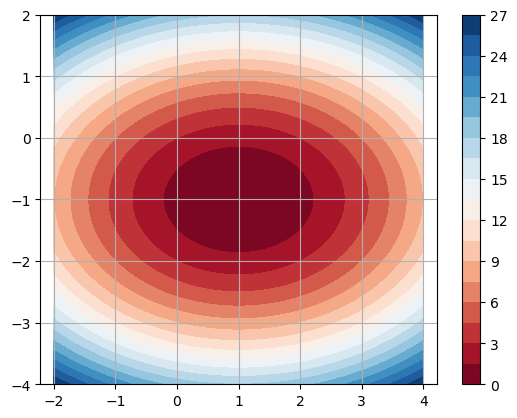

In [2]:
x = np.linspace(-2,4,50)
y = np.linspace(-4,2,50)
X,Y = np.meshgrid(x,y)
Z = (X - 1)**2 + 2*(Y + 1)**2
plt.contourf(X,Y,Z,levels=20,cmap='RdBu'), plt.colorbar()
plt.axis('equal'),plt.grid(True)
plt.show()

Compute the gradient

$$
\nabla f = (2x-2,4y+4)
$$

and compute the sequence given by gradient descent starting from $\mathbf{x}_0 = (2,1)$ with step size $\alpha = 0.1$. Terminate the algorithm when $\| \nabla f(\mathbf{x}_k) \| < 10^{-4}$.

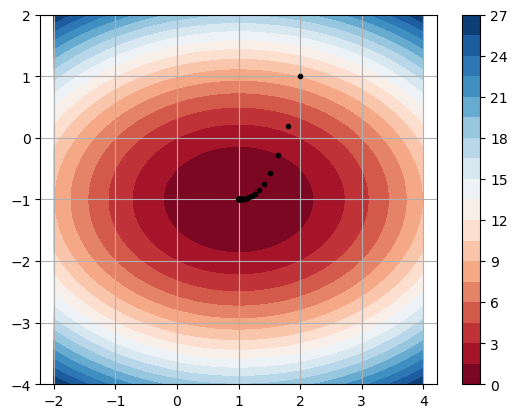

In [3]:
x = np.linspace(-2,4,50)
y = np.linspace(-4,2,50)
X,Y = np.meshgrid(x,y)
Z = (X - 1)**2 + 2*(Y + 1)**2
plt.contourf(X,Y,Z,levels=20,cmap='RdBu'), plt.colorbar()

xk = np.array([2.,1.])
plt.plot(xk[0],xk[1],'k.')
alpha = 0.1
for k in range(100):
    grad = np.array([2*xk[0] - 2,4*xk[1] + 4])
    xk = xk - alpha*grad
    plt.plot(xk[0],xk[1],'k.')
    if np.linalg.norm(grad) < 1e-4:
        break

plt.axis('equal'),plt.grid(True)
plt.show()

## Implementation

Let's write a function called `gradient_descent` which takes input parameters:

* `f` is a vector function $f(\mathbf{x})$
* `grad` is the gradient $\nabla f(\mathbf{x})$
* `x0` is an initial point $\mathbf{x}_0 \in \mathbb{R}^n$
* `alpha` is the step size
* `max_iter` is the maximum number of iterations
* `eps` is the stopping criteria $\| \nabla f(\mathbf{x}_k) \| < \epsilon$

The function returns a $m \times n$ matrix `X` where row $k$ is the point

$$
\mathbf{x}_k = \mathbf{x}_{k-1} - \alpha \nabla f(\mathbf{x}_{k-1})
$$

The algorithm stops when $\| \nabla f(\mathbf{x}_k) \| < \epsilon$ or the number of iterations exceeds `max_iter`. Therefore the number of rows of `X` is determined by the number of iterations completed. Let's include default values `alpha=0.1`, `max_iter=100` and `eps=1e-4`.

In [17]:
def gradient_descent(f,grad,x0,alpha=0.1,max_iter=100,eps=1e-4):
    X = np.zeros([max_iter+1,len(x0)])
    X[0,:] = x0
    for k in range(max_iter):
        xk = X[k,:]
        grad_xk = grad(xk)
        if np.linalg.norm(grad_xk) < eps:
            # Truncate the matrix X to include
            # only rows up to current index k
            X = X[:k+1,:]
            break
        X[k+1,:] = xk - alpha*grad_xk
    return X

Apply the function `gradient_descent` to the previous example.

In [5]:
f = lambda x: (x[0] - 1)**2 + 2*(x[1] + 1)**2
grad = lambda x: np.array([2*(x[0] - 1),4*(x[1] + 1)])
X = gradient_descent(f,grad,[2,1])

Check the first few iterations:

In [6]:
X[:5,:]

array([[ 2.    ,  1.    ],
       [ 1.8   ,  0.2   ],
       [ 1.64  , -0.28  ],
       [ 1.512 , -0.568 ],
       [ 1.4096, -0.7408]])

Check the last iterations:

In [7]:
X[-5:,:]

array([[ 1.00010634, -1.        ],
       [ 1.00008507, -1.        ],
       [ 1.00006806, -1.        ],
       [ 1.00005445, -1.        ],
       [ 1.00004356, -1.        ]])

Let's see how many iterations were computed in total:

In [8]:
X.shape

(46, 2)

Check the norm of the gradient at the last iteration. It should be less than $\epsilon = 10^{-4}$.

In [9]:
np.linalg.norm(grad(X[-1,:]))

8.711228593580309e-05

And the norm of the gradient at the second last iteration should be more than $\epsilon = 10^{-4}$:

In [10]:
np.linalg.norm(grad(X[-2,:]))

0.00010889035742372364

It works as expected!

## Example

Consider the function

$$
f(x,y) = 5x^2 + 4y^2 + x^4 + 2y^4 - 10x^2y
$$

Plot some levels curves of the function:

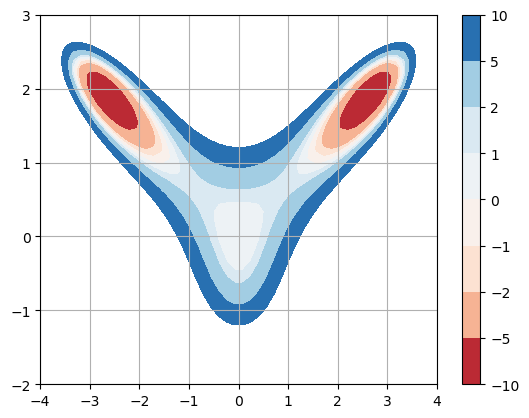

In [11]:
x = np.linspace(-4,4,50)
y = np.linspace(-2,3,50)
X,Y = np.meshgrid(x,y)
Z = 5*X**2 + 4*Y**2 + X**4 + 2*Y**4 - 10*X**2*Y
plt.contourf(X,Y,Z,levels=[-10,-5,-2,-1,0,1,2,5,10],cmap='RdBu'), plt.colorbar()
plt.grid(True)
plt.show()

We see 5 critical points. Let's approximate the local minimum near $(2.5,1.8)$. Compute the gradient

$$
\nabla f(x,y) = \left( 10x + 4x^3 - 20xy,8y + 8y^3 - 10x^2 \right)
$$

Apply gradient descent to $f(x,y)$.

In [18]:
f = lambda x: 5*x[0]**2 + 4*x[1]**2 + x[0]**4 + 2*x[1]**4 - 10*x[0]**2*x[1]
grad = lambda x: np.array([10*x[0] + 4*x[0]**3 - 20*x[0]*x[1], 8*x[1] + 8*x[1]**3 - 10*x[0]**2])
X = gradient_descent(f,grad,[2.5,1.8],0.01)

Inspect the first 5 points:

In [19]:
X[:5,:]

array([[2.5       , 1.8       ],
       [2.525     , 1.81444   ],
       [2.54485407, 1.82896844],
       [2.56201249, 1.84082887],
       [2.57638398, 1.85091924]])

And the last 5 points:

In [20]:
X[-5:,:]

array([[2.64421542, 1.89837822],
       [2.6442171 , 1.89837939],
       [2.64421847, 1.89838035],
       [2.64421957, 1.89838112],
       [2.64422047, 1.89838175]])

Plot all the points in the sequence to see it converge to the local minimum:

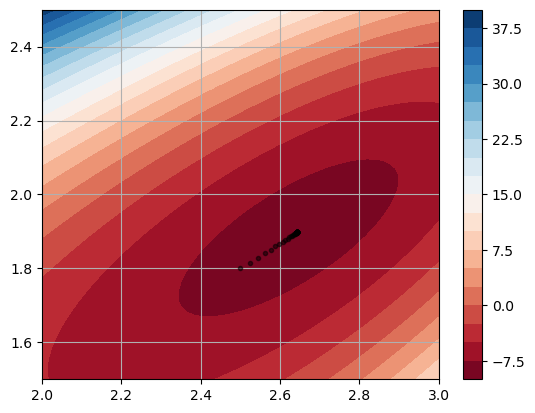

In [22]:
x = np.linspace(2,3,50)
y = np.linspace(1.5,2.5,50)
Xs,Ys = np.meshgrid(x,y)
Zs = 5*Xs**2 + 4*Ys**2 + Xs**4 + 2*Ys**4 - 10*Xs**2*Ys
plt.contourf(Xs,Ys,Zs,levels=20,cmap='RdBu'), plt.colorbar()
plt.plot(X[:,0],X[:,1],'k.',alpha=0.5)
plt.grid(True)
plt.show()

:::{seealso}
Check out [Wikipedia: Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent) for more information.
:::